In [1]:
#Loading Packages
library(tidyverse)
library(ggplot2)
library(stargazer)
library(corrr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




In [2]:
#This project was completed for my M.S. Business Analytics at Georgetown University in Programming. This
#project was a group project that I contributed to analyzing Airbnb prices across different neighborhoods
#with different parameters across the DC area.

In [3]:
#Loading data, please use the listings and reviews datasets that are attached to this notebook
Listing=read.csv("/kaggle/input/listings/Listings.csv")
Review=read.csv("/kaggle/input/reviews/Reviews.csv")

In [4]:
#We used left join to join the datasets and combined them using the "listing_id" column as the one both had in common.
ABBData= left_join(Listing,Review,by="listing_id")

In [5]:
#We ran several pieces of code to identify and replace any missing values. Here we found that there 
#were missing values in "host_acceptance" "room_type" "total_reviews" and "avg_rating" columns. We then 
#went on to identify and replace all null values with the average for their respective columns to get the 
#most accurate dataset to work with - this new clean dataset is titled "ABBV2"
anyNA(ABBData)
apply(Listing,2,anyNA) #Missing values in host_acceptance_rate & room_type

sum(is.na(ABBData$host_acceptance_rate))# 187 missing values
sum(is.na(ABBData$room_type))# 20 missing values
sum(is.na(ABBData$total_reviews))# 17 missing values
sum(is.na(ABBData$avg_rating))#17 missing values

#The code below was used to replace null values in the "Acceptance Rate" column with the average for that
#column

MisArate= which(is.na(ABBData$host_acceptance_rate)) #which rows are missing accept rates
MisArate

AvgArate = mean(ABBData$host_acceptance_rate,na.rm = T) #avg acceptance rate for entire data minus missing values

ABBData$host_acceptance_rate[MisArate] = AvgArate #replace missing accept rate with avg 

#Since "Room Type" is a categorical variable we have decided to remove all null values and rename the 
#dataset "ABBV2" 

sum(is.na(ABBData$room_type)) # of Missing room types
MisRoomType= which(is.na(ABBData$room_type)) #which rows missing rooms
MisRoomType

#remove rows with missing room type
ABBV2= ABBData[-MisRoomType, ]

[1] TRUE

listing_id           host_since host_acceptance_rate 
               FALSE                FALSE                 TRUE 
           superhost  host_total_listings         neighborhood 
               FALSE                FALSE                FALSE 
           room_type         accommodates                 beds 
                TRUE                FALSE                FALSE 
          min_nights                price 
               FALSE                FALSE

[1] 187

[1] 20

[1] 17

[1] 17

[1]    1   26   49   52   56   96  114  130  144  145  149  150  161  162  164
 [16]  172  193  195  199  205  219  221  231  241  263  267  277  280  288  289
 [31]  294  295  302  307  310  312  315  317  318  321  322  331  334  336  338
 [46]  343  347  357  359  360  371  376  380  387  391  393  398  399  400  407
 [61]  408  409  414  418  419  424  425  427  436  437  440  445  460  464  466
 [76]  472  473  475  480  485  490  492  494  514  516  517  525  527  532  536
 [91]  537  542  552  556  557  560  562  575  578  579  584  605  606  615  622
[106]  626  636  638  640  662  678  679  683  686  690  699  702  703  704  706
[121]  711  725  731  732  733  739  746  748  759  785  795  796  798  802  816
[136]  834  836  864  867  871  877  890  891  919  922  927  928  944  948  949
[151]  954  967  970  973  976  981  982 1022 1033 1036 1040 1072 1085 1170 1197
[166] 1203 1219 1296 1320 1328 1351 1372 1387 1456 1459 1503 1536 1537 1544 1550
[181] 1552 1586 1592 1598 1599 1630 1631

[1] 20

[1]   1  26  64  94 132 172 190 222 264 315 342 405 449 578 579 584 631 720 767
[20] 802

In [6]:
#We then checked the "ABBV2" dataset for null values and found that there were still missing data points
#in the "Total Reviews" and "Average Rating" columns. We used the code chunk below to remove the 17 null
#values and renamed this clean dataset "ABBV3"
anyNA(ABBV2)
apply(ABBV2,2,anyNA)#missing data in Total_reviews & Avg_rating
sum(is.na(ABBV2$total_reviews))#17
sum(is.na(ABBV2$avg_rating)) #17 Missing avg rating
MisAvgRating = which(is.na(ABBV2$avg_rating))
Misreview= which(is.na(ABBV2$total_reviews))
Misreview
MisAvgRating
ABBV3= ABBV2[-Misreview,]# removed 17 rows of missing reviews
anyNA(ABBV3)

[1] TRUE

listing_id           host_since host_acceptance_rate 
               FALSE                FALSE                FALSE 
           superhost  host_total_listings         neighborhood 
               FALSE                FALSE                FALSE 
           room_type         accommodates                 beds 
               FALSE                FALSE                FALSE 
          min_nights                price        total_reviews 
               FALSE                FALSE                 TRUE 
          avg_rating 
                TRUE

[1] 17

[1] 17

[1]   6  15  36  49  50  79 111 112 162 190 236 339 340 422 437 454 483

[1]   6  15  36  49  50  79 111 112 162 190 236 339 340 422 437 454 483

[1] FALSE

room_type,AvgPriceofRoom
<chr>,<dbl>
Entire home/apt,183.57078
Private room,124.80851
Shared room,36.52941


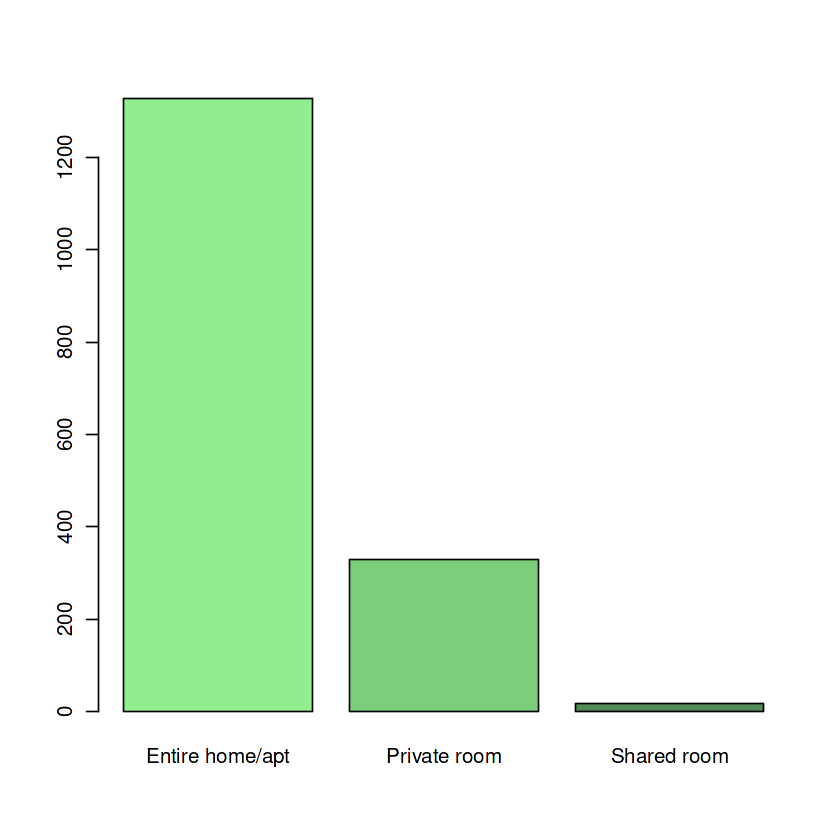

In [7]:
#With a clean dataset we decided to first look into what type of room was the most expensive
ABBV3 %>% 
  group_by(room_type) %>% 
  summarize(AvgPriceofRoom = mean(price))

##Unsurprisingly, the most expensive room type is entire home/apt, followed by private room then shared room. 

##Next we looked at what type of room was rented the mot frequently. As shown in the histogram below, entire homes/apartments were rented at a much higher rate than any other room type.
RoomType_Freq = table(ABBV3$room_type)
barplot(RoomType_Freq, col = c("palegreen2", "palegreen3", "palegreen4"))

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


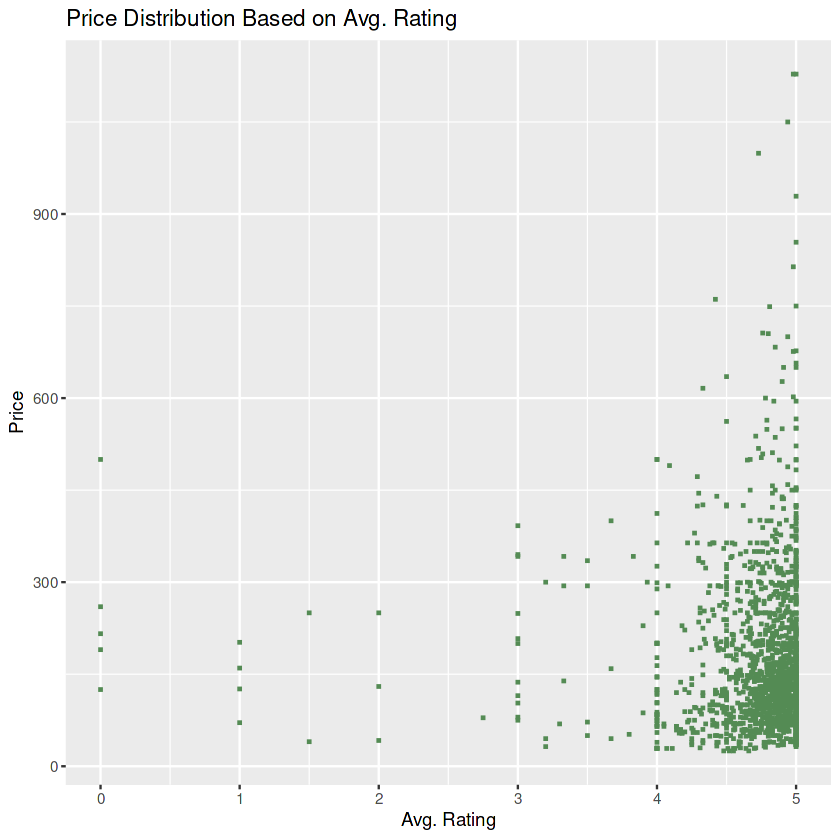

In [8]:
#Next we decided to plot price against average rating
ggplot(ABBV3,aes(avg_rating,price)) +
  geom_point(color="palegreen4",size=1,shape=15) +
  labs(x="Avg. Rating",
       y="Price",
       title="Price Distribution Based on Avg. Rating") +
  xlim(0,6)+
  scale_x_continuous()

##As you can see, the majority of listings have high ratings despite price variance. It is evident here 
#that rentals with ratings between 4.9 and 5 stars command higher prices than those with lower ratings.
#Additionally, this shows that Air BnB has very high standards and does not allow low rated properties to
#remain on the site for long*.
#SOURCE: https://www.thornpoint.net/blog/Airbnb-Review-Etiquette#:~:text=In%20fact%2C%20if%20a%20host's,below%20a%204.3%2Dstar%20rating!

In [9]:
#Next we ran a two linear regression models - one to compare the impact capacity has on price, and another
#to compare the impact neighborhood had on price.

#Linear regression model of capacity and price:
PricevsCapacity = summary(lm(price~accommodates, ABBV3))
PricevsCapacity

PricevsCapacity$sigma
PricevsCapacity$r.squared

##This shows that 27.85% of the variance in price can be attributed to the capacity of the rental.
#This R squared value is not high enough to lead us to believe that capacity is the main determinant of
#price in this dataset.

##Linear regression model of neighborhood and price:
PricevsNeighborhood = summary(lm(price~neighborhood, ABBV3))
PricevsNeighborhood

PricevsNeighborhood$sigma
PricevsNeighborhood$r.squared

#This shows that only 9.64% of variance in price can be attributed to neighborhood. This R squared value
#is not high enough to lead us to believe that capacity is the main determinant of price in this dataset.


Call:
lm(formula = price ~ accommodates, data = ABBV3)

Residuals:
    Min      1Q  Median      3Q     Max 
-362.18  -59.92  -25.97   30.44  795.85 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    51.128      5.386   9.493   <2e-16 ***
accommodates   33.837      1.332  25.409   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 107.7 on 1672 degrees of freedom
Multiple R-squared:  0.2786,	Adjusted R-squared:  0.2781 
F-statistic: 645.6 on 1 and 1672 DF,  p-value: < 2.2e-16


[1] 107.6545

[1] 0.2785723


Call:
lm(formula = price ~ neighborhood, data = ABBV3)

Residuals:
    Min      1Q  Median      3Q     Max 
-176.80  -70.75  -29.37   33.63  928.70 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 101.32      12.26   8.268 2.76e-16 ***
neighborhoodCapitol Hill     69.85      13.60   5.138 3.11e-07 ***
neighborhoodDowntown        134.48      15.75   8.540  < 2e-16 ***
neighborhoodDupont Circle    97.98      13.95   7.021 3.19e-12 ***
neighborhoodFort McNair     119.30      19.82   6.018 2.17e-09 ***
neighborhoodGeorgetown       87.26      14.64   5.960 3.08e-09 ***
neighborhoodPetworth         18.05      14.38   1.256    0.209    
neighborhoodTakoma           20.72      16.04   1.292    0.197    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 120.7 on 1666 degrees of freedom
Multiple R-squared:  0.09641,	Adjusted R-squared:  0.09262 
F-statistic:  25.4 on 7 and 1666 DF,  p-value:

[1] 120.6983

[1] 0.09641443

In [10]:
#Developed a table through base R 
ModelComparison = c("Capacity Regression", "Neighborhood Regression")

Residuals = c(PricevsCapacity$sigma, PricevsNeighborhood$sigma)
Rsquared = c(PricevsCapacity$r.squared, PricevsNeighborhood$r.squared)
ComparisonTable = data.frame(ModelComparison, Residuals, Rsquared)
ComparisonTable

ModelComparison,Residuals,Rsquared
<chr>,<dbl>,<dbl>
Capacity Regression,107.6545,0.27857226
Neighborhood Regression,120.6983,0.09641443


In [11]:
#Next we developed a function to determine the average price of a rental based on neighborhood. Here we
#show the average price of a rental in the Petworth neighborhood of DC.
meanPriceNeighborhood = function(x){
 ABBV3 %>%
 filter(neighborhood == x) %>%
 summarize(avgPrice = mean(price, na.rm = TRUE))
}
meanPriceNeighborhood("Petworth")

avgPrice
<dbl>
119.3682


In [12]:
#Finally we developed a function to determine the average price of a rental based on how many individuals
#the rental accomodates. Here we show the average price for a rental that accomodates 3 people.
meanPriceCapacity = function(x){
  ABBV3 %>%
 filter(accommodates == x) %>%
 summarize(avgPrice = mean(price, na.rm = TRUE))
}
meanPriceCapacity("3")


corABBData = correlate(ABBData)

avgPrice
<dbl>
148.7246


Non-numeric variables removed from input: `host_since`, `superhost`, `neighborhood`, and `room_type`
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'
